<p>
<h1><b><center></center></b></h1>
<center><img src="https://drive.google.com/uc?id=1UJc1ci41G6ahJ7ProKvunUOIBcTXZ6ZG" align="center" width="550"></center>
</p>
<h1><b><center>Mecánica Celeste</center></b></h1>
<h2><b><center>Prof. Jorge I. Zuluaga</center></b></h1>
<h2><b><center>Tarea 1</center></b><h2>
<h3><b><center>El sistema solar como problema de los N-cuerpos</center></b><h3>
<h5><center><b>Asignada</b>: 14 de abril de 2025</center><h5>
<h5><center><b>Entrega</b>: 8 de mayo de 2025</center><h5>
<h7><center><i>Última actualización del profesor</b>: Lunes 14 de abril de 2025, 3:30 pm</i></center><h7>



<hr/>
<b>Nombre</b>: Manuela Guisao Sepulveda
<br/>
<b>Cédula</b>: 1007053840
<br/>
<b>Última actualización</b>: 15/05/2025
<hr/>

## Enunciado

Vamos a poner en práctica en esta tarea algunos de los temas vistos en el capítulo del problema de los N-cuerpos, aplicando la teoría y los métodos vistos en clase y en taller al sistema de N-cuerpos más importante para nosotros: el sistema solar.

En lo sucesivo debe usar un sistema de unidades adecuado para nuestro problema. Se sugiere usar uno en el que: $U_M = M_\text{Sol}$, $U_L = 1$ au y $U_T = 1$ a (año). Para el conjunto de unidades elegidas calcule el valor de $G$ y los factores de conversión necesarios para convertir velocidad $U_V$, energúa $U_E$ y momentum angular $U_H$.

1. Obtener, usando la rutina `consulta_horizons` y `consulta_spice` de `pymcel` las posiciones de los 8 planetas del sistema solar, del cometa Halley y del Sol para hacer una representación en 2 dimensiones de las órbitas de los cuerpos , separando las mismas órbitas de acuerdo a los planetas interiores (hasta Marte) y los exteriores (desde Júpiter). La representación debe ser similar a esta:

<center><img src="https://drive.google.com/uc?id=1a_Vy7JpMQs4Yl8nidpVm9Lwq9UtzGVT5" align="center" width="550"></center>

2. Usando como estados iniciales (posición y velocidad) de los planetas y el Sol, aquellas que tenían en la fecha de su nacimiento, calcule el momentum angular total del sistema $\vec H$:

  $$
  \vec H = \sum_i \vec{r}_i\times{\vec p}_i
  $$

  tanto en las unidades usadas en el problema como en unidades del SI (sistema internacional). Con el vector calculado, encuentre las coordenadas (ascensión recta y declinación) del punto en el cielo hacia el que apunta este vector. A este punto lo podríamos llamar el *Polo de Laplace*. ¿Cuál es el ángulo entre el vector $\vec H$ y el eje de rotación de la Tierra? ¿Cuál es el ángulo entre este vector y el vector normal a la órbita de la Tierra?. Al plano definido por $\vec H$ por supuesto lo llamamos el *Plano Invariante de Laplace*. ¿Cuál es el ángulo que forman las órbitas de todos los planetas respecto a este plano?.

3. Usando como estados iniciales (posición y velocidad) de los planetas y el Sol, aquellas que tenían en la fecha de su nacimiento, calcule la posición de cada planeta durante un período de 30 años usando: a) el método de Euler, b) el método de Dalembert, c) el método de RK45, d) el método Radau. En cada caso calcule la evolución de la energía mecánica total del sistema como función del tiempo ¿Qué observa? Comente y discuta sus resultados.

4. Usando el mejor método de integración numérica encontrado en el punto anterior, evalue la hipótesis que afirma que el sistema solar es un sistema de N cuerpos virializado.

**NOTA**: Algunas correcciones al enunciado pueden ser publicadas con posterioridad a la formulación de la tarea. Es importante que este pendiente de la última versión de este documento antes de enviar la solución.

### Condiciones

Lea con atención está lista de condiciones que deben cumplirse al entregar la tarea para evitar sanciones en la calificación asignada:

  - La solución presentada debe ser estrictamente individual. Evite resolver la tarea en parejas o en grupos que puede conducir a códigos o soluciones idénticos o muy similares.
  - Los métodos y herramientas para resolver el problema deben ser los vistos en clase. El uso de herramientas diferentes puede ser una buena práctica en el mundo académico o laboral, pero en un curso puede también ser un indicio de un mal uso de las *asesorías* externa o del uso inapropiado de herramientas de Inteligencia Artificial (IA).
  - En caso de usar IAs para alguna parte de la solución, debe indicar qué herramienta usa en cada caso presentrar el/los *prompts* usados (agreguelos como comentarios siempre).
  - La solución debe entregarse exclusivamente como un *notebook* de Colab. No se revisa en ningún otro formato.
  - El notebook entregado debe tener todos los resultados y gráficos, calculados y a la vista.  También debe ejecutarse completamente con `Ejecutar Todo` sin producir ningún error (verifique antes de entregar).
  - El notebook debe tener explicaciones detalladas para cada paso del procedimiento usando celdas de texto. No debe poner una celda de código sin explicarla. En caso de incluir ecuaciones debe usar $\LaTeX$.
  - No se aceptan códigos en una sola celda con toda o buena parte de la solución (código *spaguetti*). Desarrolle la solución de forma *didáctica*, celda a celda.
  - Todo el código en Python debe satisfacer el estándar [*PEP-8*](https://peps.python.org/pep-0008/). Lea el estándar y póngalo en práctica.
  - **Se bonificarán la originalidad, la creatividad y los cálculos o gráficos adicionales o ilustrativos que realice más allá del objetivo fundamental de la tarea.**

## Solución

In [ ]:
!pip install -Uq pymcel

In [ ]:
import pymcel as pc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp

pymcel version  0.6.28


Lo primero que se hará, es establecer el sistema de unidades adecuado para el problema y establecer las masas necesarias para los problemas.

$U_M = M_{sol}$

$U_L = 1$ au, en kilometros es  $ 1.496$x$10^8$Km

$U_T = 1$ a (año), que son $3.154$x$10^7$Segundos


In [ ]:
pc.constantes #se cargan las constantes para sacar lo que se necesite.

<module 'pymcel.constantes' from '/usr/local/lib/python3.11/dist-packages/pymcel/constantes.py'>

In [ ]:
M_sol = pc.constantes.mu_sun / pc.constantes.G
UM = M_sol #masa solar
UL = 1 * pc.constantes.au
UT = 1 * pc.constantes.año

UV = UL / UT
UA = UL / UT**2
UF = UM * UA
UP = UM * UV # Unidad de momentum lineal
UH = UL * UP # Unidad de momentum angular
UE = UM * UV**2

Gp = pc.constantes.G * (UM*UT**2/ UL**3)

**PRIMER PUNTO**

se iniciará primero hayando las posiciones de los planetas interiores

In [ ]:
cuerpos = {
    "Sol" : 10,
    "Mercurio" : 199,
    "Venus" : 299,
    "Tierra" : 399,
    "Marte" : 499
}

Ahora escogemos las fechas:

In [ ]:
epochs = dict(
    start = '2023-05-06 18:09:45',
    stop = '2025-05-06 18:09:45' , #se tomó un intervalo de 12 años ya que a
    #jupiter le toma aproximadamente este tiempo para completar una orbita.
    step = '5d' # se pone un intervalo de 30 dias
)

Consultamos los planetas:

In [ ]:
planetas_1 = {} #se crea un diccionario para guardar el Xs de cada planeta.

for i, body in cuerpos.items(): #tome la idea del codigo de clase
  tabla, jds, Xs = pc.consulta_horizons(
      id = body,
      location = '@SSB',
      epochs = epochs
  )
  planetas_1[i] = Xs

In [ ]:
for i, body in planetas_1.items():
  print(f'Para {i} se tiene:')
  print(body)
  print()

Para Sol se tiene:
                x             y             z         vx         vy        vz
0   -1.322648e+09 -1.507234e+08  3.203917e+07   4.097468 -14.697079  0.027880
1   -1.320861e+09 -1.570655e+08  3.205084e+07   4.177405 -14.664727  0.026143
2   -1.319039e+09 -1.633939e+08  3.206175e+07   4.257710 -14.633867  0.024348
3   -1.317182e+09 -1.697094e+08  3.207187e+07   4.338658 -14.604416  0.022487
4   -1.315290e+09 -1.760123e+08  3.208117e+07   4.420548 -14.576253  0.020546
..            ...           ...           ...        ...        ...       ...
142 -7.436423e+08 -7.820345e+08  2.493537e+07  12.565701  -4.233791 -0.214909
143 -7.382147e+08 -7.838465e+08  2.484242e+07  12.562363  -4.155101 -0.215434
144 -7.327883e+08 -7.856248e+08  2.474922e+07  12.560411  -4.078141 -0.216080
145 -7.273623e+08 -7.873702e+08  2.465571e+07  12.560069  -4.002630 -0.216852
146 -7.219361e+08 -7.890832e+08  2.456184e+07  12.561564  -3.928232 -0.217751

[147 rows x 6 columns]

Para Mercurio se tie

In [ ]:
#convertimos los dataframes que imprimio el for en array para poder operar
sol = planetas_1["Sol"]
mercurio = planetas_1["Mercurio"]
venus = planetas_1["Venus"]
tierra = planetas_1["Tierra"]
marte = planetas_1["Marte"]


In [ ]:
r_sol_x, r_sol_y = (np.array(sol['x']), np.array(sol['y']))/UL
r_mercu_x, r_mercu_y = (np.array(mercurio['x']), np.array(mercurio['y']))/UL
r_venus_x, r_venus_y = (np.array(venus['x']), np.array(venus['y']))/UL
r_tierra_x, r_tierra_y = (np.array(tierra['x']), np.array(tierra['y']))/UL
r_marte_x, r_marte_y = (np.array(marte['x']), np.array(marte['y']))/UL


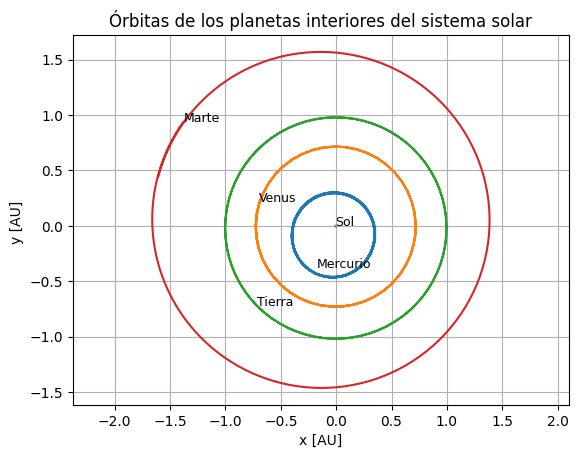

In [ ]:
plt.title('Órbitas de los planetas interiores del sistema solar')
plt.plot(r_mercu_x, r_mercu_y)
plt.plot(r_venus_x, r_venus_y)
plt.plot(r_tierra_x, r_tierra_y)
plt.plot(r_marte_x, r_marte_y)
plt.plot(r_sol_x, r_sol_y)

plt.text(r_mercu_x[1], r_mercu_y[0], 'Mercurio', fontsize=9)
plt.text(r_venus_x[0], r_venus_y[0], 'Venus', fontsize=9)
plt.text(r_tierra_x[0], r_tierra_y[0], 'Tierra', fontsize=9)
plt.text(r_marte_x[0], r_marte_y[0], 'Marte', fontsize=9)
plt.text(r_sol_x[0], r_sol_y[0], 'Sol', fontsize=9)

plt.xlabel('x [AU]')
plt.ylabel('y [AU] ')
plt.axis('equal')
plt.grid()
plt.show()

Ahora se hará lo mismo para los planetas exteriores

In [ ]:
cuerpos = {
    "Jupiter" : 599,
    "Saturno" : 699,
    "Urano" : 799,
    "Neputno" : 899,
    "Pluton" : 999,
    "Halley" : 90000030
}

In [ ]:
epochs = dict(
    start = '1800-05-06 18:09:45',
    stop = '2048-05-06 18:09:45' , #se tomó un intervalo de 12 años ya que a
    #jupiter le toma aproximadamente este tiempo para completar una orbita.
    step = '30d' # se pone un intervalo de 30 dias
)

In [ ]:
planeta = {} #se crea un diccionario para guardar el Xs de cada planeta.

for i, body in cuerpos.items(): #tome la idea del codigo de clase
  tabla, jds, Xs = pc.consulta_horizons(
      id = body,
      location = '@SSB',
      epochs = epochs
  )
  planeta[i] = Xs


In [ ]:
for i, body in planeta.items():
  print(f'Para {i} se tiene:')
  print(body)
  print()

Para Jupiter se tiene:
                 x             y             z            vx           vy  \
0    -1.465676e+11  7.595563e+11  2.645434e+08 -12976.529869 -1874.172957   
1    -1.800486e+11  7.539728e+11  1.039097e+09 -12854.187684 -2431.756608   
2    -2.131856e+11  7.469502e+11  1.811655e+09 -12710.438653 -2982.338494   
3    -2.459178e+11  7.385109e+11  2.580761e+09 -12542.833005 -3525.626581   
4    -2.781859e+11  7.286797e+11  3.344989e+09 -12353.136581 -4058.028711   
...            ...           ...           ...           ...          ...   
3015  4.398101e+11  6.046642e+11 -1.236567e+10 -10731.235095  8295.140773   
3016  4.115324e+11  6.255119e+11 -1.182032e+10 -11081.563664  7790.552990   
3017  3.823821e+11  6.450341e+11 -1.124992e+10 -11405.891371  7270.019114   
3018  3.524246e+11  6.631952e+11 -1.065576e+10 -11704.728080  6738.596960   
3019  3.217266e+11  6.799632e+11 -1.003922e+10 -11976.683250  6195.730324   

              vz  
0     299.005534  
1     298.5839

In [ ]:
jupiter = planeta["Jupiter"]
saturno = planeta["Saturno"]
urano = planeta["Urano"]
neptuno = planeta["Neputno"]
pluton = planeta["Pluton"]
halley = planeta["Halley"]

In [ ]:
r_jupiter_x, r_jupiter_y = (np.array(jupiter['x']), np.array(jupiter['y']))/UL
r_saturno_x, r_saturno_y = (np.array(saturno['x']), np.array(saturno['y']))/UL
r_urano_x, r_urano_y = (np.array(urano['x']), np.array(urano['y']))/UL
r_neptuno_x, r_neptuno_y = (np.array(neptuno['x']), np.array(neptuno['y']))/UL
r_pluton_x, r_pluton_y = (np.array(pluton['x']), np.array(pluton['y']))/UL
r_halley_x, r_halley_y = (np.array(halley['x']), np.array(halley['y']))/UL

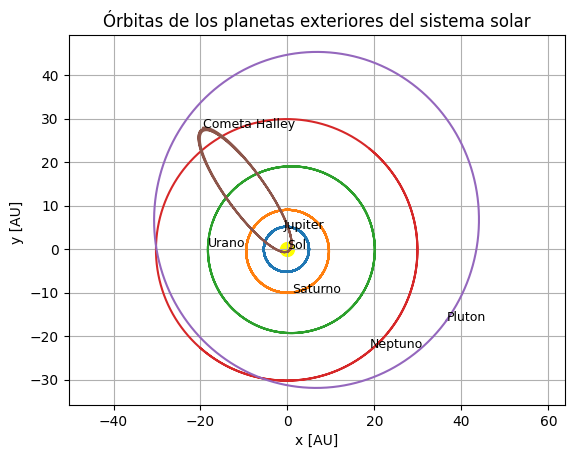

In [ ]:
plt.title('Órbitas de los planetas exteriores del sistema solar')
plt.plot(r_jupiter_x, r_jupiter_y, label = 'Jupiter')
plt.plot(r_saturno_x, r_saturno_y, label = 'Saturno')
plt.plot(r_urano_x, r_urano_y, label = 'Urano')
plt.plot(r_neptuno_x, r_neptuno_y, label = 'Neptuno')
plt.plot(r_pluton_x, r_pluton_y, label = 'Pluton')
plt.plot(r_halley_x, r_halley_y, label = 'Cometa Halley')
plt.scatter(r_sol_x[0], r_sol_y[0], color = 'yellow', s = 100, label = 'sol' )

#el plt.text es para mostrar en la orbita el nombre del planeta al que pertenece
plt.text(r_jupiter_x[0], r_jupiter_y[-1], 'Jupiter', fontsize=9)
plt.text(r_saturno_x[-5], r_saturno_y[-8], 'Saturno', fontsize=9)
plt.text(r_urano_x[0], r_urano_y[0], 'Urano', fontsize=9)
plt.text(r_neptuno_x[-1], r_neptuno_y[0], 'Neptuno', fontsize=9)
plt.text(r_pluton_x[0], r_pluton_y[0], 'Pluton', fontsize=9)
plt.text(r_halley_x[0], r_halley_y[0], 'Cometa Halley', fontsize=9)
plt.text(r_sol_x[0], r_sol_y[0], 'Sol', fontsize=9)

plt.xlabel('x [AU]')
plt.ylabel('y [AU] ')
plt.axis('equal')
plt.grid()

**SEGUNDO PUNTO**

Usando como estados iniciales (posición y velocidad) de los planetas y el Sol, aquellas que tenían en la fecha de su nacimiento, calcule el momentum angular total del sistema $\vec H$:

  $$
  \vec H = \sum_i \vec{r}_i\times{\vec p}_i
  $$

  tanto en las unidades usadas en el problema como en unidades del SI (sistema internacional). Con el vector calculado, encuentre las coordenadas (ascensión recta y declinación) del punto en el cielo hacia el que apunta este vector. A este punto lo podríamos llamar el *Polo de Laplace*. ¿Cuál es el ángulo entre el vector $\vec H$ y el eje de rotación de la Tierra? ¿Cuál es el ángulo entre este vector y el vector normal a la órbita de la Tierra?. Al plano definido por $\vec H$ por supuesto lo llamamos el *Plano Invariante de Laplace*. ¿Cuál es el ángulo que forman las órbitas de todos los planetas respecto a este plano?.

primero se define las constantes a utilizar y se crea un diccionario con el nombre de cada cuerpo del sistema solar, luego en el for se hallará la masa respectiva del cuerpo

In [ ]:
G = pc.constantes.G
sol = pc.constantes.mu_sun
mercurio = pc.constantes.mu_mercury
venus = pc.constantes.mu_venus
tierra = pc.constantes.mu_earth
marte = pc.constantes.mu_mars
jupiter = pc.constantes.mu_jupiter
saturno = pc.constantes.mu_saturn
urano = pc.constantes.mu_uranus
neptuno = pc.constantes.mu_neptune
pluton = pc.constantes.mu_pluto

In [ ]:
masas_cuerpos= {
    'Sol' : sol,
    'Mercurio' : mercurio,
    'Venus' : venus,
    'Tierra' : tierra,
    'Marte' : marte,
    'Jupiter' : jupiter,
    'Saturno' : saturno,
    'Urano' : urano,
    'Neptuno' : neptuno,
    'Pluton' : pluton
}

In [ ]:
masas = {}
for i, body in masas_cuerpos.items():
  m = body / G
  masas[i] = m

for i,body in masas.items():
  print(f'para {i} su masa es {body:.3e}Kg')

para Sol su masa es 1.988e+30Kg
para Mercurio su masa es 3.301e+23Kg
para Venus su masa es 4.867e+24Kg
para Tierra su masa es 5.972e+24Kg
para Marte su masa es 6.417e+23Kg
para Jupiter su masa es 1.899e+27Kg
para Saturno su masa es 5.685e+26Kg
para Urano su masa es 8.682e+25Kg
para Neptuno su masa es 1.024e+26Kg
para Pluton su masa es 1.462e+22Kg


teniendo ya la masa de cada cuerpo, se crea otro diccionario en donde se define el id de cada cuerpo para hallar la posicion y velocidad inicial de cada cuerpo con horizons

In [ ]:
sistema = {
    "Sol" : 10,
    "Mercurio" : 199,
    "Venus" : 299,
    "Tierra" : 399,
    "Marte" : 499,
    "Jupiter" : 599,
    "Saturno" : 699,
    "Urano" : 799,
    "Neptuno" : 899,
    "Pluton" : 999,
}

In [ ]:
planetas = {}

for i, body in sistema.items(): #tome la idea del codigo de clase
  tabla, jds, Xs = pc.consulta_horizons(
      id = body,
      location = '@SSB',
      epochs = '2003-03-30 00:00:00',
  )
  planetas[i] = Xs


In [ ]:
for i,body in planetas.items():
  print(f'para {i} se tiene')
  print(body)
  print()

para Sol se tiene
[ 2.92413699e+08 -6.57565272e+08 -1.90200854e+06  1.10364628e+01
  8.22860023e+00 -3.29653466e-01]

para Mercurio se tiene
[ 3.42616054e+10  3.22992505e+10 -4.27141010e+08 -4.35307626e+04
  3.70339268e+04  7.02053171e+03]

para Venus se tiene
[ 1.63480309e+10 -1.08257647e+11 -2.40020359e+09  3.44141835e+04
  5.05454798e+03 -1.91704690e+03]

para Tierra se tiene
[-1.47313244e+11 -2.36178101e+10 -1.33280667e+06  4.09957805e+03
 -2.95493027e+04 -1.66697378e-01]

para Marte se tiene
[-9.56857873e+10 -2.05660530e+11 -1.93852733e+09  2.28725253e+04
 -8.18512227e+03 -7.33668336e+02]

para Jupiter se tiene
[-5.87300271e+11  5.38298622e+11  1.09092429e+10 -8.99075140e+03
 -9.01560537e+03  2.38499246e+02]

para Saturno se tiene
[ 1.50254450e+10  1.35025966e+12 -2.40910330e+10 -1.01740014e+04
  8.67938332e+01  4.02929233e+02]

para Urano se tiene
[ 2.57284905e+12 -1.53387166e+12 -3.90340801e+10  3.43745129e+03
  5.53217717e+03 -2.40714828e+01]

para Neptuno se tiene
[ 2.95134123

In [ ]:
L_total = np.zeros(3)
for i,n in planetas.items():
  r1 = n[:3] / UL
  v1 = n[3:6] / UV
  masa = masas[i] / UM
  L_total +=  np.cross(r1, masa*v1)

print(f'el momentum angular total del sistema solar es {L_total} UM*UA^2 / UT')

el momentum angular total del sistema solar es [0.00058305 0.00018473 0.02220854] UM*UA^2 / UT


In [ ]:
print('En unidades del SI, el momentum angular total del sistema solar es:')
print(f'{L_total*UH} Kg*m^2/s')

En unidades del SI, el momentum angular total del sistema solar es:
[8.22169281e+41 2.60492937e+41 3.13164711e+43] Kg*m^2/s


el vector que hayamos esta en coordenadas eclipticas cartesianas, se pasarán a esfericas eclipticas para hacer cambio de coordenadas a ecuatoriales y poder hallar la ascensión recta y declinación.
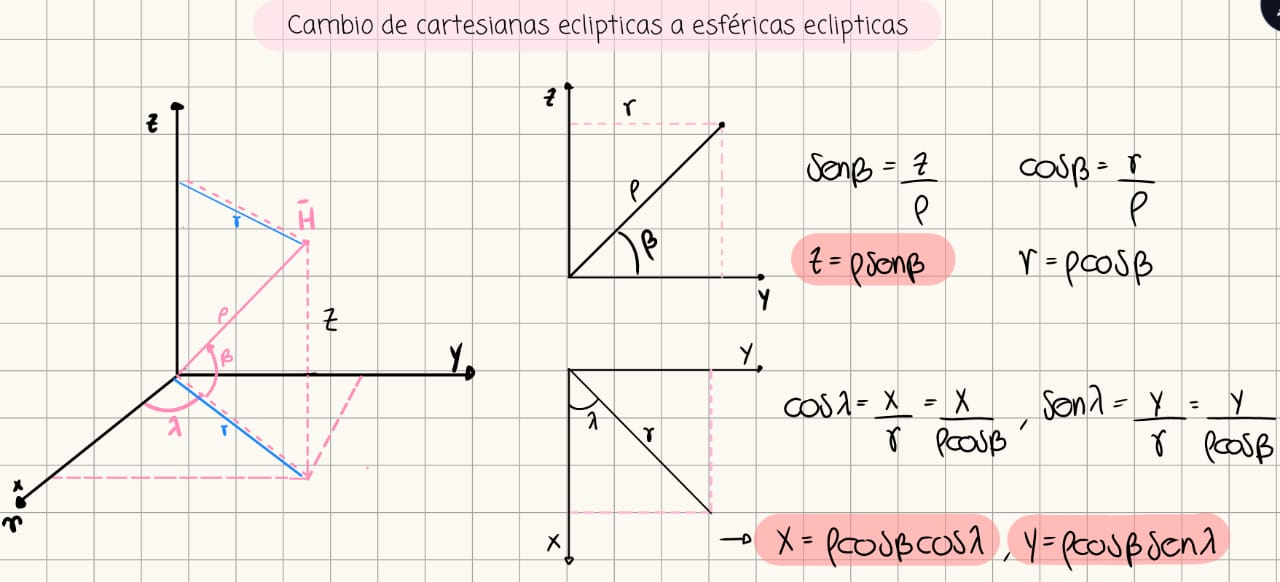


las ecuaciones de cartesianas eclipticas a esfericas eclipticas nos queda:

$x = \rho \cos(β) \cos (λ)$

$y = \rho \sin (λ) \cos(β)$

$z = \rho \cos (\beta)$

en donde $\beta$ es la latitud ecliptica y $\lambda$ es la longitud ecliptica, despejando respectivamente de las formulas, tenemos:

$\beta = \arcsin(z)$

 $\lambda = \arctan (\frac{y}{x})$


Se normaliza el vector H para poder tomarlo como unitario en las ecuaciones x,y,z.


In [ ]:
norm_L_total = L_total / np.linalg.norm(L_total)

In [ ]:
beta = np.arcsin(norm_L_total[2]) #se halla el valor de (α,δ).
lamba = np.arctan(norm_L_total[1]/norm_L_total[0])

print(f'en coord. esfericas tenemos que la latitud es {beta:.3f} rad')
print(f' y l longitud es {lamba:.3f} rad')

en coord. esfericas tenemos que la latitud es 1.543 rad
 y l longitud es 0.307 rad


In [ ]:
e = np.radians(23.43) #oblicuidad de la ecliptica

delta = np.arcsin(np.sin(beta) * np.cos(e) + np.cos(beta) \
                  * np.sin(e) * np.sin(lamba))

p = -np.sin(beta) * np.sin(e) + np.cos(beta) * np.cos(e) * np.sin(lamba)
q = np.cos(lamba) * np.cos(beta)

alfa = np.arctan( p / q ) + 2*np.pi
  #se le suma 360° por condiciones de cambio de coordenadas

delta1 = np.degrees(delta)
alfa1 = np.degrees(alfa)

print(f'el polo de Laplace esta ubicado a {alfa1:.5}° y {delta1:.5f}°')

el polo de Laplace esta ubicado a 273.85° y 67.00003°


ahora se quiere hallar el angulo entre el vector $\vec H$ y el eje de rotación de la tierra.

Se puede hallar entre el producto punto entre dos vectores, tomando el vector $\vec T$ como el vector del eje de rotación de la tierra unitario, y analizando la imagen vemos las componentes de $\vec T$

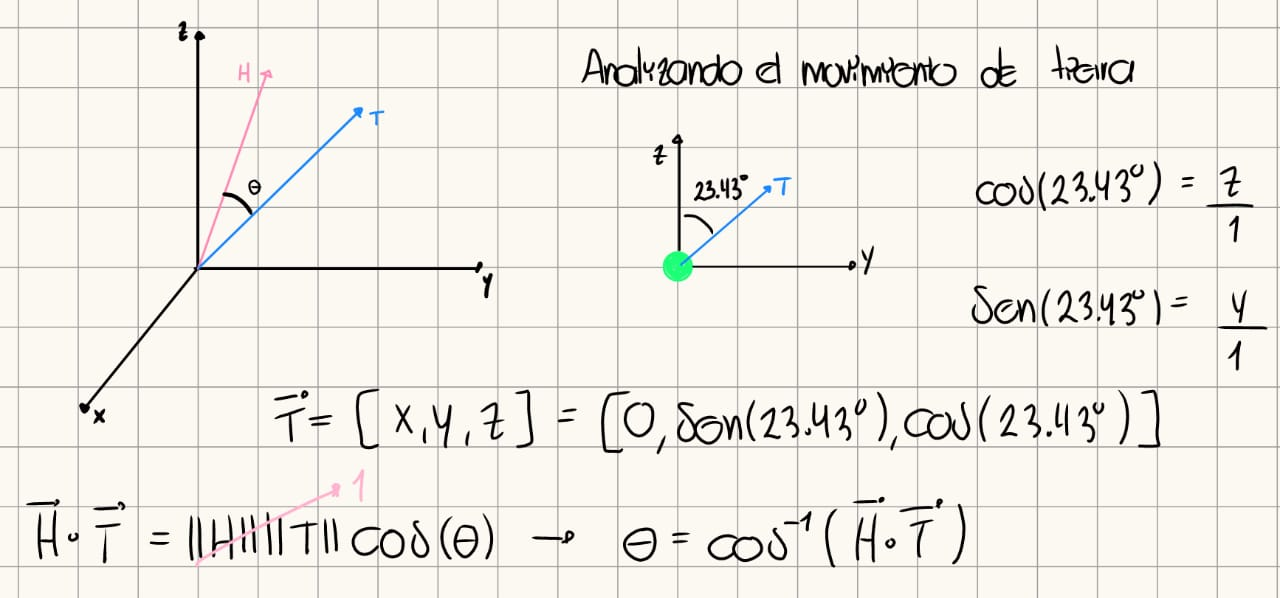

por lo tanto, el ángulo será entonces: $\theta = \arccos(\vec H\cdot \vec T)$



In [ ]:
angle = np.radians(23.43)

T = [0, np.sin(angle), np.cos(angle)] #componentes de T

dot_H_T = np.dot(norm_L_total, T)
theta = np.arccos(dot_H_T)

print(f'el angulo entre H y el eje de rotacion de la tierra \
 es {(np.degrees(theta)):.3f}°')

el angulo entre H y el eje de rotacion de la tierra  es 23.000°


¿cuál es el ángulo entre este vector?
si la orbita se mueve sobre el plano x-y, el vector normal a esta seria el eje z, y tendriamos un vector con solo componente en z, sería de la forma $T = [0, 0, 1]$.

entonces nuevamente hacemos producto punto entre $\vec H$ y $\vec T$.

$ \vec H \cdot \vec T = ||H||||T||\cos(\theta)  $

la magnitud de $\vec H$ y $\vec T$  porque H esta normalizado y T lo tomamos unitario.

el valor del angulo serio $\theta = \arccos(\vec H \cdot \vec T)$

In [ ]:
T1 = [0, 0, 1] #componente vector normal a la orbita
h_t_dott = np.dot(norm_L_total, T1)
theta1 = np.arccos(h_t_dott)

print(f'el ángulo ente ellos es {(np.degrees(theta1)):.3f}°')

el ángulo ente ellos es 1.578°


¿Cuál es el ángulo que forman las orbitas de todos los planetas respecto al plano invariable de Laplace?

para este caso se hallará el momentum angular de cada planeta y se hará el producto punto con el vector $\vec H$

In [ ]:
momentum = {}

#reutilizando el codigo del momento angular total
for i, n in planetas.items():
  r1 = np.array(n[:3]) / UL
  v1 = np.array(n[3:6]) / UV
  masa = masas[i] / UM
  L_total =  np.cross(r1, masa*v1)
  momentum[i] = L_total

#se normaliza cada momentum angular para poder operar el producto punto entre
#los dos vectores.
momentum_norm = {}

for i, m in momentum.items():
  norm = m / np.linalg.norm(m)
  momentum_norm[i] = norm


In [ ]:
for i,n in momentum_norm.items():
  h_t_dott = np.dot(norm_L_total, n)
  theta = np.arccos(h_t_dott)
  print(f'el ángulo entre el vector normal a la orbita de {i} \
   y H es {(np.degrees(theta)):.3f}°')

el ángulo entre el vector normal a la orbita de Sol    y H es 0.129°
el ángulo entre el vector normal a la orbita de Mercurio    y H es 6.367°
el ángulo entre el vector normal a la orbita de Venus    y H es 2.187°
el ángulo entre el vector normal a la orbita de Tierra    y H es 1.578°
el ángulo entre el vector normal a la orbita de Marte    y H es 1.675°
el ángulo entre el vector normal a la orbita de Jupiter    y H es 0.326°
el ángulo entre el vector normal a la orbita de Saturno    y H es 0.931°
el ángulo entre el vector normal a la orbita de Urano    y H es 1.026°
el ángulo entre el vector normal a la orbita de Neptuno    y H es 0.724°
el ángulo entre el vector normal a la orbita de Pluton    y H es 15.677°


**TERCER PUNTO**

 *Usando como estados iniciales (posición y velocidad) de los planetas y el Sol, aquellas que tenían en la fecha de su nacimiento, calcule la posición de cada planeta durante un período de 30 años usando: a) el método de Euler, b) el método de Dalembert, c) el método de RK45, d) el método Radau. En cada caso calcule la evolución de la energía mecánica total del sistema como función del tiempo ¿Qué observa? Comente y discuta sus resultados.*


Reutilizando los diccionario hayados en el punto interior

**a)** Método de Euler

In [ ]:
deltat = 0.001
T = 30
Nt = int(T / deltat)

posiciones ={}
velocidades = {}

for cuerpo, m in planetas.items():
  posiciones[cuerpo] = [np.array(m[:3]) / UL]
  velocidades[cuerpo] = [np.array(m[3:6]) / UV]

for _ in range(Nt):
  rnueva = {}
  vnueva = {}
  for n in posiciones:
    rnueva[n] = posiciones[n][-1] + velocidades[n][-1] * deltat

    aceleracion = np.zeros(3)
    for j in posiciones:
      if n != j:
        aceleracion += (Gp * masas[j] / UM) * (posiciones[n][-1] - posiciones[j][-1]) \
        / np.linalg.norm(posiciones[n][-1] - posiciones[j][-1])**3

    vnueva[n] = velocidades[n][-1] - aceleracion * deltat

  for n in posiciones:
    posiciones[n].append(rnueva[n])
    velocidades[n].append(vnueva[n])

ahora se graficará el metodo de Euler para confirmar si esta dando correctamente

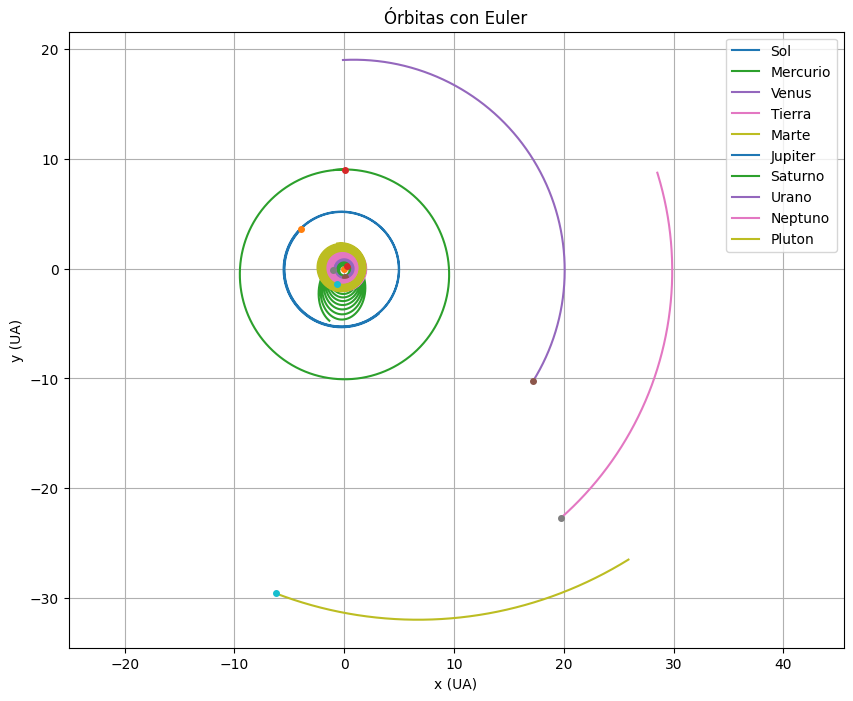

In [ ]:
plt.figure(figsize=(10,8))
for i, n in posiciones.items():
    datos = np.array(n)
    plt.plot(datos[:, 0], datos[:, 1], label=i)
    plt.plot(datos[0, 0], datos[0, 1], 'o', markersize=4)

plt.xlabel('x (UA)')
plt.ylabel('y (UA)')
plt.title('Órbitas con Euler')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

Ahora calculando la energia mecanica

In [ ]:
K_total = []
U_total = []

for t in range(Nt):
    k_t = 0.0
    u_t = 0.0

    #Calculo energia cinetica
    for n in posiciones:
        v = np.array(velocidades[n][t])
        m = masas[n]
        k_t += 0.5 * m * np.linalg.norm(v)**2

    #Calculo energía potencial
    nombres = list(posiciones.keys())
    for i in range(len(nombres)):
        for j in range(i+1, len(nombres)):
            ri = np.array(posiciones[nombres[i]][t])
            rj = np.array(posiciones[nombres[j]][t])
            mi = masas[nombres[i]]
            mj = masas[nombres[j]]
            rij = np.linalg.norm(ri - rj)
            u_t += -Gp * mi * mj / (UM * rij)

    K_total.append(k_t)
    U_total.append(u_t)

In [ ]:
E_total = np.array(K_total) + np.array(U_total)
E_prom = np.mean(E_total) / UE  # si quieres convertir a unidades físicas
print(f"Energía mecánica promedio: {E_prom:.6e}")

Energía mecánica promedio: -1.930905e-10


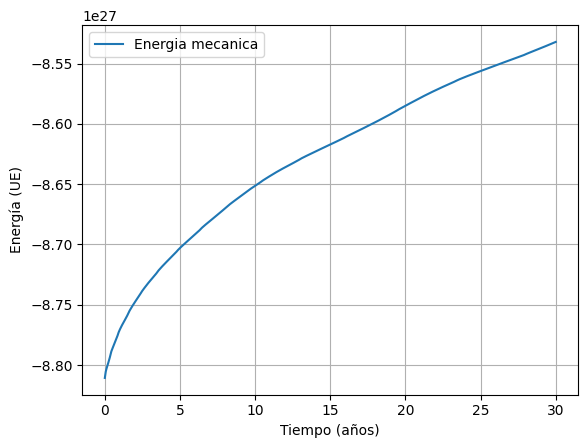

In [ ]:
t = np.linspace(0, T, Nt)
plt.plot(t, E_total, label='Energia mecanica')
plt.xlabel('Tiempo (años)')
plt.ylabel('Energía (UE)')
plt.legend()
plt.grid()

b) método de Dalembert

In [ ]:
deltat = 0.001
T = 30 #tiempo que se quiere hallar las posiciones
Nt = int(T / deltat)

posiciones1 ={}
velocidades1 = {}

for cuerpo, m in planetas.items():
  posiciones1[cuerpo] = [np.array(m[:3]) / UL]
  velocidades1[cuerpo] = [np.array(m[3:6]) / UV]

for _ in range(Nt):
  aceleraciones = {}

  for i in posiciones1:
    aceleracion = np.zeros(3)
    for j in posiciones1:
      if i != j:
        aceleracion += (Gp * masas[j] / UM) * (posiciones1[i][-1] -  \
posiciones1[j][-1]) / np.linalg.norm(posiciones1[i][-1] - posiciones1[j][-1])**3

    aceleraciones[i] = aceleracion

  vnueva = {}
  rnueva = {}

  for i in posiciones:
    v_0 = velocidades1[i][-1] - aceleraciones[i] * deltat
    r_0 = posiciones1[i][-1] + v_0 * deltat

    vnueva[i] = v_0
    rnueva[i] = r_0


  for n in posiciones1:
    posiciones1[n].append(rnueva[n])
    velocidades1[n].append(vnueva[n])

ahora graficando para verificar si esta dando valores correctos

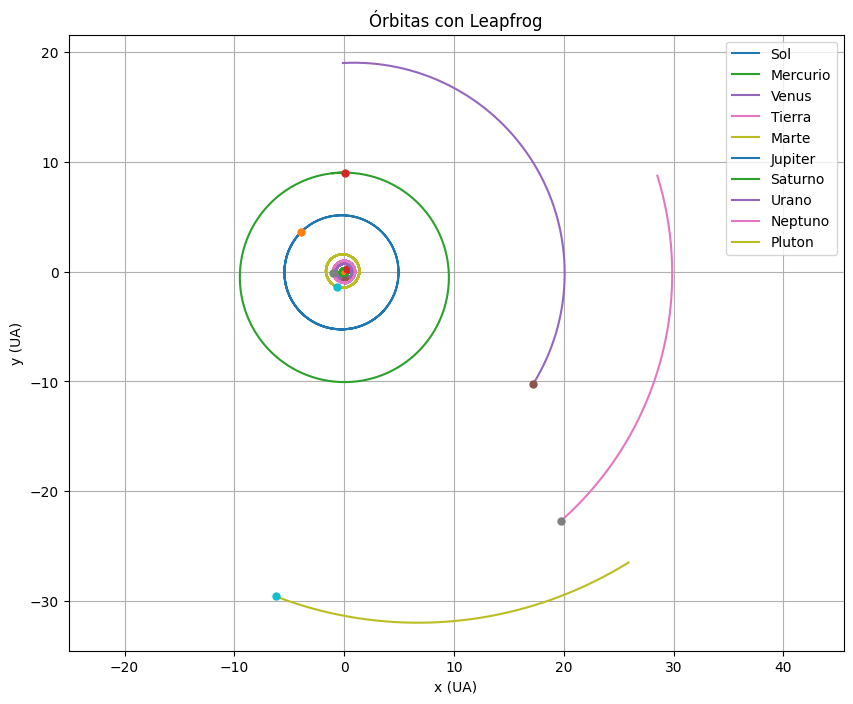

In [ ]:
plt.figure(figsize=(10, 8))

for cuerpo, trayectoria in posiciones1.items():
    trayectoria = np.array(trayectoria)
    plt.plot(trayectoria[:, 0], trayectoria[:, 1], label=cuerpo)
    plt.plot(trayectoria[0, 0], trayectoria[0, 1], 'o', markersize=5)


plt.xlabel("x (UA)")
plt.ylabel("y (UA)")
plt.title("Órbitas con Leapfrog")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()

ahora calculando la energia mecanica, reutilzando el codigo del anterior

In [ ]:
K_total1 = []
U_total1 = []

for t in range(Nt):
    k_t = 0.0
    u_t = 0.0

    #Calculo energia cinetica
    for n in posiciones1:
        v = np.array(velocidades1[n][t])
        m = masas[n]
        k_t += 0.5 * m * np.linalg.norm(v)**2

    #Calculo energía potencial
    nombres = list(posiciones1.keys())
    for i in range(len(nombres)):
        for j in range(i+1, len(nombres)):
            ri = np.array(posiciones1[nombres[i]][t])
            rj = np.array(posiciones1[nombres[j]][t])
            mi = masas[nombres[i]]
            mj = masas[nombres[j]]
            rij = np.linalg.norm(ri - rj)
            u_t += -Gp * mi * mj / (UM * rij)

    K_total1.append(k_t)
    U_total1.append(u_t)

In [ ]:
E_total1 = np.array(K_total) + np.array(U_total)
E_prom = np.mean(E_total) / UE  # si quieres convertir a unidades físicas
print(f"Energía mecánica promedio: {E_prom:.6e}")

Energía mecánica promedio: -1.930905e-10


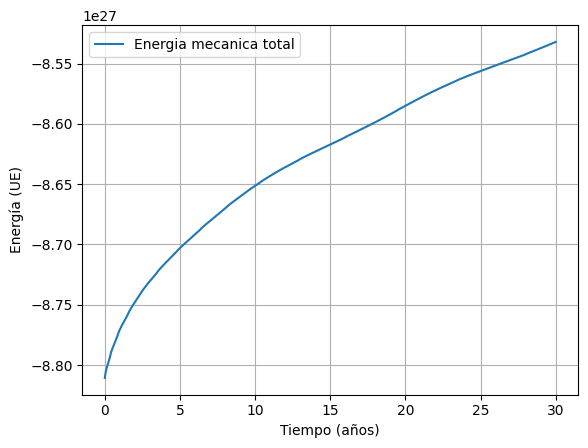

In [ ]:
t = np.linspace(0, T, Nt)
plt.plot(t, E_total, label = 'Energia mecanica total')
plt.xlabel('Tiempo (años)')
plt.ylabel('Energía (UE)')
plt.legend()
plt.grid()

c) utilizando el metodo de RK45

In [ ]:
#se guardaran todas las posiciones y velocidades iniciales en un solo vector

cuerpos = list(planetas.keys())

y = []

for n in cuerpos:
  r = np.array(planetas[n][:3]) / UL
  v = np.array(planetas[n][3:6]) / UV
  y.extend(r)
  y.extend(v)

y = np.array(y)

def cambio(t, y):
  N = len(masas)
  dt = np.zeros_like(y)
  for i in range(N):

    ri = y[6*i:6*i +3]
    vi = y[6*i+3:6*i+6]

    dt[6*i:6*i+3] = vi

    aceleracion = np.zeros(3)

    for j in range(N):
      if i!= j:
        rj = y[6*j:6*j+3]
        rij = ri- rj
        norm = np.linalg.norm(rij)
        aceleracion += -Gp * masas[cuerpos[j]] / UM * (rij) / norm**3


    dt[6*i+3:6*i+6] = aceleracion

  return dt

Luego de crear la funcion en donde se quiere hallar la posicion y velocidad de cada planeta, se le mete a solve_ivp para que la resuelva con 'RK45'

In [ ]:
T = 30
dt = 0.001
Nt = int(T / dt)

t_span = (0,T)
t_inter = np.linspace(0, T, Nt)

solucion = solve_ivp(cambio, t_span, y, t_eval= t_inter, method = 'RK45')

posiciones_rk45 = {n: [] for n in cuerpos} #se crea un diccionario para
#almacenar las posiciones.
for i, n in enumerate(cuerpos):
    r = solucion.y[6*i:6*i+3, :]
    posiciones_rk45[n] = r.T

Graficando para combrobar si son buenos resultados.

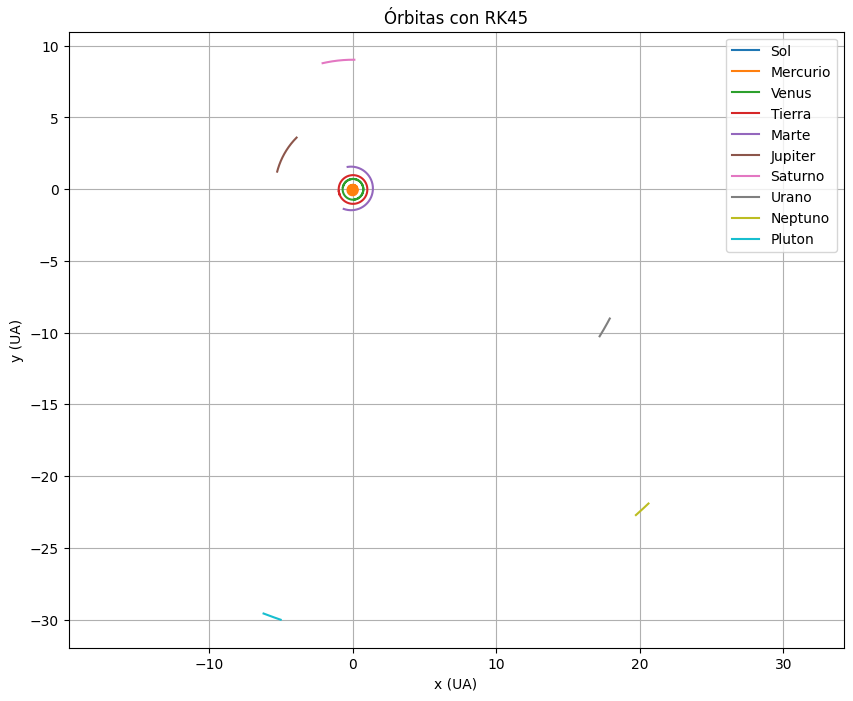

In [ ]:
plt.figure(figsize=(10,8))
for n in cuerpos:
    r = np.array(posiciones_rk45[n])
    plt.plot(r[:,0], r[:,1], label=n)
plt.xlabel('x (UA)')
plt.ylabel('y (UA)')
plt.title('Órbitas con RK45')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

d) metodo de radau.

como en RK45 se organizó ya el vector en donde primero se tienen las posiciones y luevo velocidades entonces para este punto se tomará el código para el metodo de RK45 pero se el cambia en solve_ivp por 'radau'

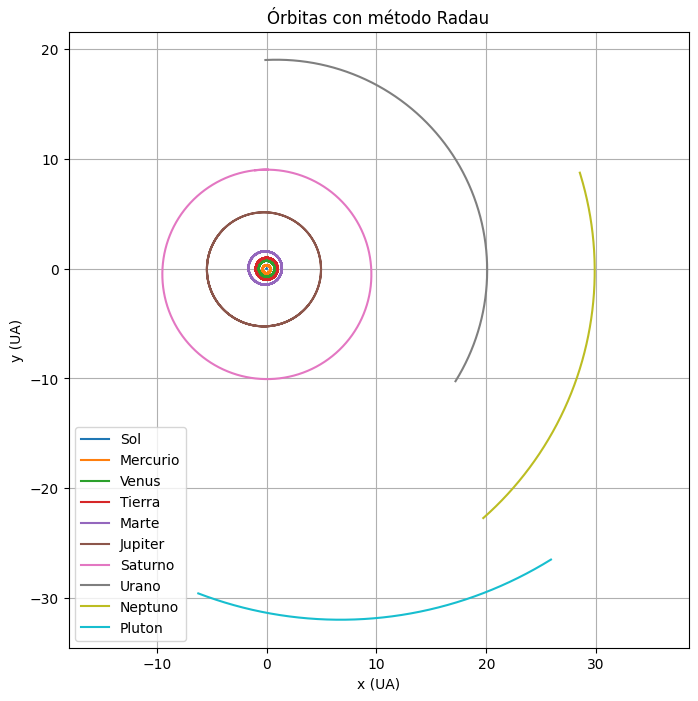

In [ ]:
solucion1 = solve_ivp(cambio, t_span, y, t_eval=t_inter, method='Radau')

posiciones_radau = {n: [] for n in cuerpos}
for i, nombre in enumerate(cuerpos):
    r = solucion1.y[6*i : 6*i+3, :].T
    posiciones_radau[nombre] = r

#graficando de una vez para verificar.
plt.figure(figsize=(8, 8))
for nombre in cuerpos:
    r = posiciones_radau[nombre]
    plt.plot(r[:, 0], r[:, 1], label=nombre)

plt.xlabel("x (UA)")
plt.ylabel("y (UA)")
plt.title("Órbitas con método Radau")
plt.legend()
plt.axis("equal")
plt.grid(True)
plt.show()

***Cuarto Punto***

Usando el mejor método de integración numérica encontrado en el punto anterior, evalue la hipótesis que afirma que el sistema solar es un sistema de N cuerpos virializado.

Para este punto se resolverá primero sacando los vectores posicion y velocidad del metodo de radau, para hallar la energia potencial y cinetica y mirar si se cumple el teorema del virial

 $2 \langle K \rangle = - \langle U \rangle$

In [ ]:
posiciones_radau = {n: [] for n in cuerpos}
velocidades_radau = {n: [] for n in cuerpos}

for i, n in enumerate(cuerpos):
    r = solucion1.y[6*i:6*i+3, :]
    v = solucion1.y[6*i+3:6*i+6, :]
    posiciones_radau[n] = r.T
    velocidades_radau[n] = v.T

In [ ]:
#halando la energia cinetica
k_energia = {}

for nombre in cuerpos:
  v = velocidades_radau[nombre]
  v2 = np.sum(v**2, axis = 1)
  m = masas[nombre]
  k = 1/2 * m * v2
  k_energia[nombre] = k

  k_total = np.concatenate(list(k_energia.values()))
  prom_k = np.mean(k_total) / UE

print(f'el promedio 2K de la energia del sistema es {2*prom_k} UE')

el promedio 2K de la energia del sistema es 3.91020408560947e-11 UE


In [ ]:
#hallando la energia potencial
U_total = np.zeros(len(t_inter))
nombres = list(cuerpos)

for i in range(len(nombres)):
    for j in range(i+1, len(nombres)):

        ri = posiciones_radau[nombres[i]]
        rj = posiciones_radau[nombres[j]]

        rij = ri - rj
        dist = np.linalg.norm(rij, axis=1)

        mi = masas[nombres[i]]
        mj = masas[nombres[j]]


        Uij = -Gp * (mi * mj / UM) / dist
        U_total += Uij / UE


print(f'la energia U del sistema es {U_total.mean()} UE')

la energia U del sistema es -3.9270241973666134e-10 UE


viendo lo resultados cuando se imprime $2\langle K \rangle$ y $\langle U \rangle$, una es el negativo de la otra y difieren en muy pocos decimales, por lo tanto se podria decir que el sistema esta virializado.